In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow
import missingno as msno
import os


import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Modling:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Model Evaluation:
from sklearn.metrics import silhouette_score

# IN CASE you don't have pyarrow  and plotlyinstalled, run the following command in your terminal
# pip install pyarrow 
# pip install plotly

[ERROR] 2022-11-15T19:06:46.257384Z, 6583, 6583, "Error performing handshake with server 10.183.3.126:55001"
[ERROR] 2022-11-15T19:06:46.257411Z, 6583, 6583, "Unable to connect to server. Initial handshake failed."
[ERROR] 2022-11-15T19:06:46.257428Z, 6583, 6583, "Error establishing connection in generated_nvmlInitWithFlags: Connection refused"
[ERROR] 2022-11-15T19:06:46.257454Z, 6583, 6583, "Communication error(s), check network connectivity"


In [2]:
df = pd.read_parquet('daily_20221004.parquet.gzip')

In [3]:
df['uid'] = df['symbol'] + '_'+ df['id'].astype(str)

In [4]:
df_t = df.copy()
df_t.head()

time_open  \
symbol_id time_close                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:00:00.000Z   
          2020-11-24T00:59:59.999Z  2020-11-24T00:00:00.000Z   
          2020-11-25T00:59:59.999Z  2020-11-25T00:00:00.000Z   
          2020-11-26T00:59:59.999Z  2020-11-26T00:00:00.000Z   
          2020-11-27T00:59:59.999Z  2020-11-27T00:00:00.000Z   

                                                   time_high  \
symbol_id time_close                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:00:07.000Z   
          2020-11-24T00:59:59.999Z  2020-11-24T00:00:07.000Z   
          2020-11-25T00:59:59.999Z  2020-11-25T00:00:06.000Z   
          2020-11-26T00:59:59.999Z  2020-11-26T00:56:05.000Z   
          2020-11-27T00:59:59.999Z  2020-11-27T00:57:05.000Z   

                                                    time_low  quote.USD.open  \
symbol_id time_close                                                           
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:37:05.000Z       90.554933   
          2020-11-24T00:59:59.999Z  2020-11-24T00:40:06.000Z       85.161030   
          2020-11-25T00:59:59.999Z  2020-11-25T00:58:05.000Z       57.527366   
          2020-11-26T00:59:59.999Z  2020-11-26T00:13:06.000Z       39.466839   
          2020-11-27T00:59:59.999Z  2020-11-27T00:16:05.000Z       30.002092   

                                    quote.USD.high  quote.USD.low  \
symbol_id time_close                                                
MPH_7742  2020-11-23T00:59:59.999Z       90.554933      79.852330   
          2020-11-24T00:59:59.999Z       85.161030      80.694133   
          2020-11-25T00:59:59.999Z       57.527366      53.679986   
          2020-11-26T00:59:59.999Z       40.121814      38.980499   
          2020-11-27T00:59:59.999Z       30.391962      29.690305   

                                    quote.USD.close  quote.USD.volume  \
symbol_id time_close                                                    
MPH_7742  2020-11-23T00:59:59.999Z        85.599205      1.600851e+07   
          2020-11-24T00:59:59.999Z        81.645754      1.009738e+07   
          2020-11-25T00:59:59.999Z        53.704963      8.899399e+06   
          2020-11-26T00:59:59.999Z        40.056399      4.225065e+06   
          2020-11-27T00:59:59.999Z        30.383005      2.933446e+06   

                                    quote.USD.market_cap  \
symbol_id time_close                                       
MPH_7742  2020-11-23T00:59:59.999Z                   0.0   
          2020-11-24T00:59:59.999Z                   0.0   
          2020-11-25T00:59:59.999Z                   0.0   
          2020-11-26T00:59:59.999Z                   0.0   
          2020-11-27T00:59:59.999Z                   0.0   

                                         quote.USD.timestamp symbol    id  \
symbol_id time_close                                                        
MPH_7742  2020-11-23T00:59:59.999Z  2020-11-23T00:59:59.999Z    MPH  7742   
          2020-11-24T00:59:59.999Z  2020-11-24T00:59:59.999Z    MPH  7742   
          2020-11-25T00:59:59.999Z  2020-11-25T00:59:59.999Z    MPH  7742   
          2020-11-26T00:59:59.999Z  2020-11-26T00:59:59.999Z    MPH  7742   
          2020-11-27T00:59:59.999Z  2020-11-27T00:59:59.999Z    MPH  7742   

                                         uid  
symbol_id time_close                          
MPH_7742  2020-11-23T00:59:59.999Z  MPH_7742  
          2020-11-24T00:59:59.999Z  MPH_7742  
          2020-11-25T00:59:59.999Z  MPH_7742  
          2020-11-26T00:59:59.999Z  MPH_7742  
          2020-11-27T00:59:59.999Z  MPH_7742

In [5]:
df_t.columns.to_series().groupby(df_t.dtypes).groups

{int64: ['id'], float64: ['quote.USD.open', 'quote.USD.high', 'quote.USD.low', 'quote.USD.close', 'quote.USD.volume', 'quote.USD.market_cap'], object: ['time_open', 'time_high', 'time_low', 'quote.USD.timestamp', 'symbol', 'uid']}

In [6]:
features = ['quote.USD.open',
       'quote.USD.high', 'quote.USD.low', 'quote.USD.close',
       'quote.USD.volume', 'quote.USD.market_cap']
df_t = df_t[features]
scaler = StandardScaler()
scaler.fit(df_t)
print(scaler.mean_)
df_n = scaler.transform(df_t)
df_n = pd.DataFrame(df_n, columns = features)
df_n.head()

[2.59362676e+02 2.61223981e+02 2.57357434e+02 2.59305516e+02
 1.21227236e+10 1.23850265e+09]


,quote.USD.open,quote.USD.high,quote.USD.low,quote.USD.close,quote.USD.volume,quote.USD.market_cap
0,-0.051759,-0.051956,-0.054870,-0.053279,-0.002106,-0.05942
1,-0.053413,-0.053598,-0.054610,-0.054491,-0.002107,-0.05942
2,-0.061886,-0.062011,-0.062961,-0.063061,-0.002107,-0.05942
3,-0.067423,-0.067309,-0.067504,-0.067248,-0.002108,-0.05942
4,-0.070325,-0.070271,-0.070376,-0.070215,-0.002108,-0.05942


In [7]:
df_final = pd.concat([df.reset_index().drop(['quote.USD.open',
       'quote.USD.high', 'quote.USD.low', 'quote.USD.close',
       'quote.USD.volume', 'quote.USD.market_cap'], axis =1),df_n], axis = 1)
df_final.head()

,symbol_id,time_close,time_open,time_high,time_low,quote.USD.timestamp,symbol,id,uid,quote.USD.open,quote.USD.high,quote.USD.low,quote.USD.close,quote.USD.volume,quote.USD.market_cap
0,MPH_7742,2020-11-23T00:59:59.999Z,2020-11-23T00:00:00.000Z,2020-11-23T00:00:07.000Z,2020-11-23T00:37:05.000Z,2020-11-23T00:59:59.999Z,MPH,7742,MPH_7742,-0.051759,-0.051956,-0.054870,-0.053279,-0.002106,-0.05942
1,MPH_7742,2020-11-24T00:59:59.999Z,2020-11-24T00:00:00.000Z,2020-11-24T00:00:07.000Z,2020-11-24T00:40:06.000Z,2020-11-24T00:59:59.999Z,MPH,7742,MPH_7742,-0.053413,-0.053598,-0.054610,-0.054491,-0.002107,-0.05942
2,MPH_7742,2020-11-25T00:59:59.999Z,2020-11-25T00:00:00.000Z,2020-11-25T00:00:06.000Z,2020-11-25T00:58:05.000Z,2020-11-25T00:59:59.999Z,MPH,7742,MPH_7742,-0.061886,-0.062011,-0.062961,-0.063061,-0.002107,-0.05942
3,MPH_7742,2020-11-26T00:59:59.999Z,2020-11-26T00:00:00.000Z,2020-11-26T00:56:05.000Z,2020-11-26T00:13:06.000Z,2020-11-26T00:59:59.999Z,MPH,7742,MPH_7742,-0.067423,-0.067309,-0.067504,-0.067248,-0.002108,-0.05942
4,MPH_7742,2020-11-27T00:59:59.999Z,2020-11-27T00:00:00.000Z,2020-11-27T00:57:05.000Z,2020-11-27T00:16:05.000Z,2020-11-27T00:59:59.999Z,MPH,7742,MPH_7742,-0.070325,-0.070271,-0.070376,-0.070215,-0.002108,-0.05942


In [8]:
df_final = df_final.set_index(['symbol_id', 'time_close'])

In [9]:
df_final = df_final.drop(['id','symbol'], axis = 1)

In [10]:
df_final = df_final.drop(['time_open', 'quote.USD.timestamp'], axis = 1)

In [11]:
df_final['minute_high'] = [t.minute for t in pd.DatetimeIndex(df.time_high)]
df_final['minute_low'] = [t.minute for t in pd.DatetimeIndex(df.time_low)]
df_final['sec_high'] = [t.second for t in pd.DatetimeIndex(df.time_high)]
df_final['sec_low'] = [t.second for t in pd.DatetimeIndex(df.time_low)]

In [12]:
df_final = df_final.drop(['time_high', 'time_low'], axis = 1)

In [13]:
new_feature = ['minute_high', 'minute_low', 'sec_high', 'sec_low']
df_newcat = df_final[new_feature]
df_newcat = scaler.fit_transform(df_newcat)
df_newcat = pd.DataFrame(df_newcat, columns=new_feature)

In [14]:
df_final_copy = df_final.copy()
df_final_copy = pd.concat([df_final_copy.reset_index().drop(new_feature, axis = 1), df_newcat], axis = 1)
df_final_copy = df_final_copy.set_index(['symbol_id', 'time_close'])

In [15]:
df_final_copy = df_final_copy.dropna(axis = 0)

In [16]:
df_final_copy 

uid  quote.USD.open  quote.USD.high  \
symbol_id time_close                                                           
MPH_7742  2020-11-23T00:59:59.999Z  MPH_7742       -0.051759       -0.051956   
          2020-11-24T00:59:59.999Z  MPH_7742       -0.053413       -0.053598   
          2020-11-25T00:59:59.999Z  MPH_7742       -0.061886       -0.062011   
          2020-11-26T00:59:59.999Z  MPH_7742       -0.067423       -0.067309   
          2020-11-27T00:59:59.999Z  MPH_7742       -0.070325       -0.070271   
...                                      ...             ...             ...   
CXO_2490  2022-07-01T00:59:59.999Z  CXO_2490       -0.079504       -0.079503   
          2022-07-02T00:59:59.999Z  CXO_2490       -0.079505       -0.079504   
          2022-07-03T00:59:59.999Z  CXO_2490       -0.079505       -0.079504   
          2022-07-04T00:59:59.999Z  CXO_2490       -0.079505       -0.079504   
          2022-07-05T00:59:59.999Z  CXO_2490       -0.079503       -0.079503   

                                    quote.USD.low  quote.USD.close  \
symbol_id time_close                                                 
MPH_7742  2020-11-23T00:59:59.999Z      -0.054870        -0.053279   
          2020-11-24T00:59:59.999Z      -0.054610        -0.054491   
          2020-11-25T00:59:59.999Z      -0.062961        -0.063061   
          2020-11-26T00:59:59.999Z      -0.067504        -0.067248   
          2020-11-27T00:59:59.999Z      -0.070376        -0.070215   
...                                           ...              ...   
CXO_2490  2022-07-01T00:59:59.999Z      -0.079534        -0.079513   
          2022-07-02T00:59:59.999Z      -0.079534        -0.079514   
          2022-07-03T00:59:59.999Z      -0.079534        -0.079514   
          2022-07-04T00:59:59.999Z      -0.079534        -0.079514   
          2022-07-05T00:59:59.999Z      -0.079533        -0.079513   

                                    quote.USD.volume  quote.USD.market_cap  \
symbol_id time_close                                                         
MPH_7742  2020-11-23T00:59:59.999Z         -0.002106             -0.059420   
          2020-11-24T00:59:59.999Z         -0.002107             -0.059420   
          2020-11-25T00:59:59.999Z         -0.002107             -0.059420   
          2020-11-26T00:59:59.999Z         -0.002108             -0.059420   
          2020-11-27T00:59:59.999Z         -0.002108             -0.059420   
...                                              ...                   ...   
CXO_2490  2022-07-01T00:59:59.999Z         -0.002108             -0.058753   
          2022-07-02T00:59:59.999Z         -0.002108             -0.058784   
          2022-07-03T00:59:59.999Z         -0.002108             -0.058783   
          2022-07-04T00:59:59.999Z         -0.002108             -0.058780   
          2022-07-05T00:59:59.999Z         -0.002108             -0.058738   

                                    minute_high  minute_low  sec_high  \
symbol_id time_close                                                    
MPH_7742  2020-11-23T00:59:59.999Z    -1.308405    0.420403 -0.056313   
          2020-11-24T00:59:59.999Z    -1.308405    0.564676 -0.056313   
          2020-11-25T00:59:59.999Z    -1.308405    1.430313 -0.167048   
          2020-11-26T00:59:59.999Z     1.395706   -0.733778 -0.277782   
          2020-11-27T00:59:59.999Z     1.443994   -0.589506 -0.277782   
...                                         ...         ...       ...   
CXO_2490  2022-07-01T00:59:59.999Z     0.333377   -1.022324 -0.831453   
          2022-07-02T00:59:59.999Z    -0.342651    1.478404 -0.831453   
          2022-07-03T00:59:59.999Z    -0.487514    0.324222 -0.831453   
          2022-07-04T00:59:59.999Z    -0.535802   -1.022324 -0.831453   
          2022-07-05T00:59:59.999Z     1.347418   -1.022324 -0.831453   

                                     sec_low  
symbol_id time_close                          
MPH_7742  2020-11-23T00:59:59.

In [17]:
df_final_copy.drop('uid', inplace=True, axis=1)
df_final_copy

quote.USD.open  quote.USD.high  \
symbol_id time_close                                                 
MPH_7742  2020-11-23T00:59:59.999Z       -0.051759       -0.051956   
          2020-11-24T00:59:59.999Z       -0.053413       -0.053598   
          2020-11-25T00:59:59.999Z       -0.061886       -0.062011   
          2020-11-26T00:59:59.999Z       -0.067423       -0.067309   
          2020-11-27T00:59:59.999Z       -0.070325       -0.070271   
...                                            ...             ...   
CXO_2490  2022-07-01T00:59:59.999Z       -0.079504       -0.079503   
          2022-07-02T00:59:59.999Z       -0.079505       -0.079504   
          2022-07-03T00:59:59.999Z       -0.079505       -0.079504   
          2022-07-04T00:59:59.999Z       -0.079505       -0.079504   
          2022-07-05T00:59:59.999Z       -0.079503       -0.079503   

                                    quote.USD.low  quote.USD.close  \
symbol_id time_close                                                 
MPH_7742  2020-11-23T00:59:59.999Z      -0.054870        -0.053279   
          2020-11-24T00:59:59.999Z      -0.054610        -0.054491   
          2020-11-25T00:59:59.999Z      -0.062961        -0.063061   
          2020-11-26T00:59:59.999Z      -0.067504        -0.067248   
          2020-11-27T00:59:59.999Z      -0.070376        -0.070215   
...                                           ...              ...   
CXO_2490  2022-07-01T00:59:59.999Z      -0.079534        -0.079513   
          2022-07-02T00:59:59.999Z      -0.079534        -0.079514   
          2022-07-03T00:59:59.999Z      -0.079534        -0.079514   
          2022-07-04T00:59:59.999Z      -0.079534        -0.079514   
          2022-07-05T00:59:59.999Z      -0.079533        -0.079513   

                                    quote.USD.volume  quote.USD.market_cap  \
symbol_id time_close                                                         
MPH_7742  2020-11-23T00:59:59.999Z         -0.002106             -0.059420   
          2020-11-24T00:59:59.999Z         -0.002107             -0.059420   
          2020-11-25T00:59:59.999Z         -0.002107             -0.059420   
          2020-11-26T00:59:59.999Z         -0.002108             -0.059420   
          2020-11-27T00:59:59.999Z         -0.002108             -0.059420   
...                                              ...                   ...   
CXO_2490  2022-07-01T00:59:59.999Z         -0.002108             -0.058753   
          2022-07-02T00:59:59.999Z         -0.002108             -0.058784   
          2022-07-03T00:59:59.999Z         -0.002108             -0.058783   
          2022-07-04T00:59:59.999Z         -0.002108             -0.058780   
          2022-07-05T00:59:59.999Z         -0.002108             -0.058738   

                                    minute_high  minute_low  sec_high  \
symbol_id time_close                                                    
MPH_7742  2020-11-23T00:59:59.999Z    -1.308405    0.420403 -0.056313   
          2020-11-24T00:59:59.999Z    -1.308405    0.564676 -0.056313   
          2020-11-25T00:59:59.999Z    -1.308405    1.430313 -0.167048   
          2020-11-26T00:59:59.999Z     1.395706   -0.733778 -0.277782   
          2020-11-27T00:59:59.999Z     1.443994   -0.589506 -0.277782   
...                                         ...         ...       ...   
CXO_2490  2022-07-01T00:59:59.999Z     0.333377   -1.022324 -0.831453   
          2022-07-02T00:59:59.999Z    -0.342651    1.478404 -0.831453   
          2022-07-03T00:59:59.999Z    -0.487514    0.324222 -0.831453   
          2022-07-04T00:59:59.999Z    -0.535802   -1.022324 -0.831453   
          2022-07-05T00:59:59.999Z     1.347418   -1.022324 -0.831453   

                                     sec_low  
symbol_id time_close                          
MPH_7742  2020-11-23T00:59:59.999Z -0.297594  
          2020-11-24T00:59:59.999Z -0.188209  
          2020-11-25T00:59:59.999Z -0.297594  
          2020

In [18]:
print(df_final_copy.shape)

(742019, 10)


0.1 3 -0.5317871063339535
0.1 4 -0.5454626429993619
0.1 5 -0.559454528394594
0.1 6 -0.5486568699779469
0.1 8 -0.547800465784064
0.1 10 -0.502703253969424
0.1 20 -0.3457158841247886
0.2 3 -0.6008569386331979
0.2 4 -0.553546288865657
0.2 5 -0.5708025454063181
0.2 6 -0.5450622918136305
0.2 8 -0.5466523081895449
0.2 10 -0.5291109261184154
0.2 20 -0.30343032201465797
0.5 3 -0.3330164970322977
0.5 4 -0.21678675100808578
0.5 5 -0.2965774963400655
0.5 6 -0.1868501196885465
0.5 8 -0.07416754530307952
0.5 10 0.07707863998723025
0.5 20 0.33629243829106964
1 3 0.16029905299728534
1 4 0.37155624798957687
1 5 0.3797333371522831
1 6 0.3952547665853924
1 8 0.5054342878508823
1 10 0.4274173353488394
1 20 0.34477933851793974
1.5 3 0.5041374245666227
1.5 4 0.5321623512112805
1.5 5 0.5471755517071734
1.5 6 0.5516564967304602
1.5 8 0.5535399856882196
1.5 10 0.5530194868548715
1.5 20 0.5523293193074176
1.7 3 0.4712527218551495
1.7 4 0.5154637183214648
1.7 5 0.5262942698514994
1.7 6 0.5495596426483874
1.7 8 

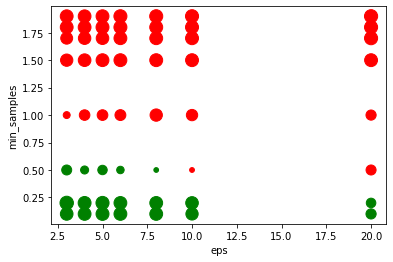

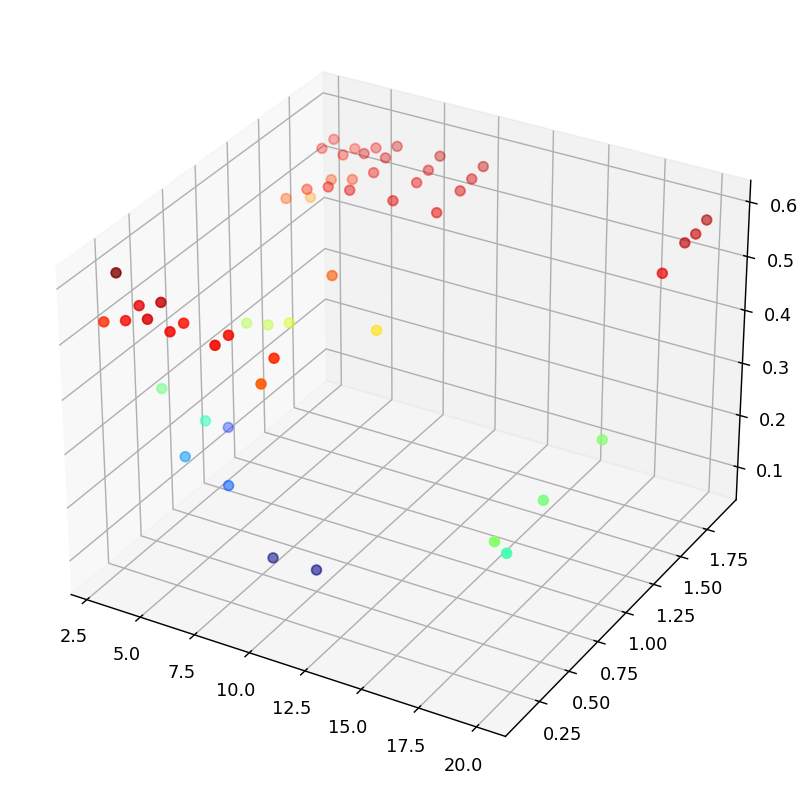

In [22]:
from sklearn.cluster import DBSCAN
xp,yp,zp=[],[],[]
xn,yn,zn=[],[],[]
# 网格搜索
for eps_ in [0.1,0.2,0.5,1,1.5,1.7,1.8,1.9]:
       for ms in [3,4,5,6,8,10,20]:
              try:
                     DBSCAN_cluster = DBSCAN(eps=eps_, min_samples=ms,metric='manhattan').fit(df_final_copy[0:10000])
                     labels=DBSCAN_cluster.labels_
                     s1=silhouette_score(df_final_copy[0:10000], labels)
                     if s1>0:
                            xp.append(ms)
                            yp.append(eps_)
                            zp.append(s1*300)
                     elif s1<0:
                            xn.append(ms)
                            yn.append(eps_)
                            zn.append(-s1*300)
                     print(eps_,ms,s1)
              except:
                     print(eps_, ms, 0)

plt.scatter(xp,yp,zp,c='r')
plt.scatter(xn,yn,zn,c='g')
plt.ylabel('min_samples')
plt.xlabel('eps')
plt.show()
fig = plt.figure(dpi=128, figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xp+xn, yp+yn, [i/300 for i in zp+zn],c=[i/300 for i in zp+zn],s=30,cmap=plt.cm.jet)
plt.show()
#选出最佳的eps和min_samples

In [29]:
#函数
def class_sep(labels):#用来统计类别个数
       sample_class = {}
       class_item=set(labels)
       for i in class_item:
              print('cluster',i)
              sample_class[i]=[]
       k=0
       for i in labels:
              sample_class[i].append(k)
              k+=1
       return sample_class,len(class_item)


# 最佳的eps和min_sample跑结果
eps_best=1.5
ms_best=8
DBSCAN_cluster = DBSCAN(eps=eps_best, min_samples=ms_best,metric='manhattan').fit(df_final_copy[0:1000])
labels = DBSCAN_cluster.labels_

# 统计类别个数，以及各个sample的类别
sample_class,n_class=class_sep(labels)
for k,v in sample_class.items():
       print('------------------------------')
       print(k)
       print(v)
print(labels)


# import numpy as np
# parameters = {'eps':[0.3,0.4,0.5,0.6], 'min_samples':[20,30,40]}
# db = DBSCAN(metric='cosine', algorithm='brute').fit(df_final_copy)
# grid = GridSearchCV(db, parameters, cv=5, scoring='adjusted_rand_score')



cluster 0
cluster 1
cluster 2
cluster 3
cluster -1
------------------------------
0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 